<a href="https://colab.research.google.com/github/crazyhamster09/clients/blob/main/Clients.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Клиенты авиакомпании

Датасет содержит информацию о клиентах некоторой авиакомпании

## Импорт библиотек, константы

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
RANDOM_STATE = 42

In [3]:
DATASET_PATH = "https://raw.githubusercontent.com/evgpat/edu_stepik_from_idea_to_mvp/main/datasets/clients.csv"

## Загрузка и обзор данных

### Загрузка

In [4]:
# загрузка данных
df = pd.read_csv(DATASET_PATH)

### Описание данных

**Целевая переменная**
- `satisfaction`: удовлетворенность клиента полетом, бинарная (*satisfied* или *neutral or dissatisfied*)

**Признаки**
- `Gender` (categorical: _Male_ или _Female_): пол клиента
- `Age` (numeric, int): количество полных лет
- `Customer Type` (categorical: _Loyal Customer_ или _disloyal Customer_): лоялен ли клиент авиакомпании?
- `Type of Travel` (categorical: _Business travel_ или _Personal Travel_): тип поездки
- `Class` (categorical: _Business_ или _Eco_, или _Eco Plus_): класс обслуживания в самолете
- `Flight Distance` (numeric, int): дальность перелета (в милях)
- `Departure Delay in Minutes` (numeric, int): задержка отправления (неотрицательная)
- `Arrival Delay in Minutes` (numeric, int): задержка прибытия (неотрицательная)
- `Inflight wifi service` (categorical, int): оценка клиентом интернета на борту
- `Departure/Arrival time convenient` (categorical, int): оценка клиентом удобство времени прилета и вылета
- `Ease of Online booking` (categorical, int): оценка клиентом удобства онлайн-бронирования
- `Gate location` (categorical, int): оценка клиентом расположения выхода на посадку в аэропорту
- `Food and drink` (categorical, int): оценка клиентом еды и напитков на борту
- `Online boarding` (categorical, int): оценка клиентом выбора места в самолете
- `Seat comfort` (categorical, int): оценка клиентом удобства сиденья
- `Inflight entertainment` (categorical, int): оценка клиентом развлечений на борту
- `On-board service` (categorical, int): оценка клиентом обслуживания на борту
- `Leg room service` (categorical, int): оценка клиентом места в ногах на борту
- `Baggage handling` (categorical, int): оценка клиентом обращения с багажом
- `Checkin service` (categorical, int): оценка клиентом регистрации на рейс
- `Inflight service` (categorical, int): оценка клиентом обслуживания на борту
- `Cleanliness` (categorical, int): оценка клиентом чистоты на борту

In [ ]:
# информация от столбцах
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   Gender                             129549 non-null  object 
 2   Age                                129564 non-null  float64
 3   Customer Type                      129803 non-null  object 
 4   Type of Travel                     129779 non-null  object 
 5   Class                              129764 non-null  object 
 6   Flight Distance                    129786 non-null  float64
 7   Departure Delay in Minutes         129773 non-null  float64
 8   Arrival Delay in Minutes           129371 non-null  float64
 9   Inflight wifi service              129835 non-null  float64
 10  Departure/Arrival time convenient  129831 non-null  float64
 11  Ease of Online booking             1298

In [ ]:
# случайные три записи из датасета
df.sample(3)

In [ ]:
df.describe()

,id,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
count,129880.000000,129564.000000,129786.000000,129773.000000,129371.000000,129835.000000,129831.000000,129837.000000,129842.000000,129830.000000,129834.000000,129832.000000,129833.000000,129836.000000,129834.000000,129832.000000,129838.000000,129817.00000,129843.000000
mean,64940.500000,40.113951,1323.385804,15.811301,16.651406,2.732183,3.061857,2.760523,2.981424,3.208349,3.256674,3.445691,3.361395,3.387181,3.356101,3.636107,3.310056,3.64718,3.289865
std,37493.270818,20.365190,4516.191530,93.206139,109.167328,1.359786,1.559323,1.430800,1.312628,1.357649,1.381889,1.349732,1.366866,1.335540,1.361633,1.221818,1.298626,1.21837,1.347625
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,32470.750000,27.000000,414.000000,0.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.00000,2.000000
50%,64940.500000,40.000000,846.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.00000,3.000000
75%,97410.250000,51.000000,1744.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.00000,4.000000
max,129880.000000,621.000000,379620.000000,22227.000000,14006.000000,45.000000,45.000000,45.000000,36.000000,45.000000,40.000000,45.000000,45.000000,45.000000,40.000000,40.000000,45.000000,40.00000,45.000000


В данных есть выбросы.

In [ ]:
df.describe(include='object')

,Gender,Customer Type,Type of Travel,Class,satisfaction
count,129549,129803,129779,129764,129880
unique,2,2,2,3,3
top,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
freq,65726,106040,89625,62103,58879


In [ ]:
df[['satisfaction']].describe()

,satisfaction
count,129880
unique,3
top,neutral or dissatisfied
freq,58879


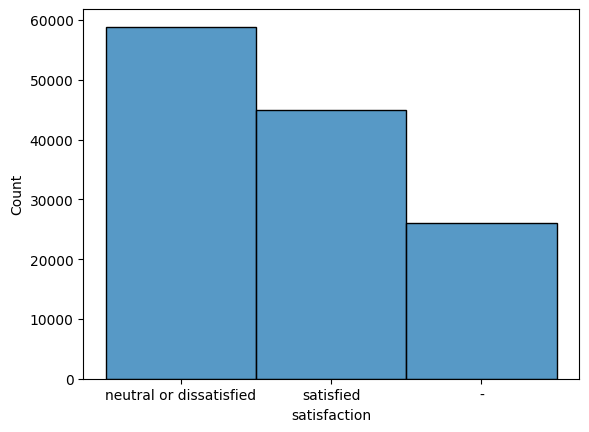

In [ ]:
sns.histplot(df['satisfaction'])
plt.show()

В данных есть пропуски.

In [ ]:
df['satisfaction'].value_counts(dropna=False, normalize=True)

neutral or dissatisfied    0.453334
satisfied                  0.346666
-                          0.200000
Name: satisfaction, dtype: float64

Доля пропусков 20%.

In [5]:
df = df[df.satisfaction != '-']

Gender

In [ ]:
df['Gender'].value_counts(dropna=False, normalize=True)

Female    0.506052
Male      0.491400
NaN       0.002549
Name: Gender, dtype: float64

Доля пропусков меньше 1%

In [6]:
df = df.dropna()

<Axes: xlabel='Gender', ylabel='count'>

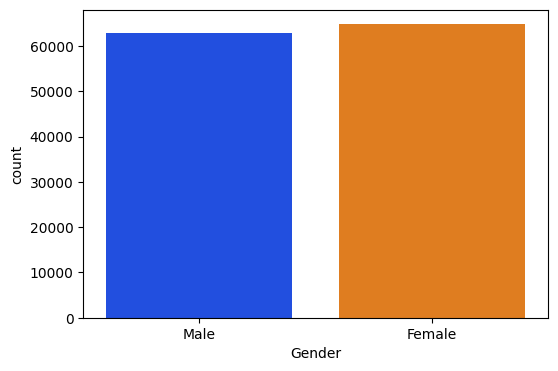

In [ ]:
plt.figure(figsize=(6,4))

sns.countplot(x='Gender', data = df_clean, palette='bright')

In [7]:
Q1 = df['Age'].quantile(q=.25)
Q3 = df['Age'].quantile(q=.75)

#only keep rows in dataframe that have values within 1.5\*IQR of Q1 and Q3
df = df[(df['Age'] > Q1-1.5*(Q3-Q1)) & (df['Age'] < Q3+1.5*(Q3-Q1))& (df['Flight Distance'] > Q1-1.5*(Q3-Q1)) & (df['Flight Distance'] < Q3+1.5*(Q3-Q1))&(df['Departure Delay in Minutes'] > Q1-1.5*(Q3-Q1)) & (df['Departure Delay in Minutes'] < Q3+1.5*(Q3-Q1)) & (df['Arrival Delay in Minutes'] > Q1-1.5*(Q3-Q1)) & (df['Arrival Delay in Minutes'] < Q3+1.5*(Q3-Q1))& (df['Departure/Arrival time convenient'] > Q1-1.5*(Q3-Q1)) & (df['Departure/Arrival time convenient'] < Q3+1.5*(Q3-Q1))]



In [8]:
df = df[(df['Departure/Arrival time convenient'] <= 5)]

In [9]:
df = df[(df['Inflight entertainment'] <= 5) & (df['Checkin service'] <= 5) &(df['Cleanliness'] <= 5)]

In [10]:
df.describe()

,id,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
count,500.000000,500.000000,500.0000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,41909.982000,40.602000,76.0440,7.868000,8.844000,2.748000,3.236000,2.552000,2.982000,3.232000,2.898000,3.36000,3.37600,3.238000,3.156000,3.562000,3.192000,3.492000,3.314000
std,16652.273096,15.917233,11.9247,16.321377,17.360369,1.403009,1.631449,1.529698,1.316489,1.396451,1.517961,1.37338,1.37492,1.311792,1.453234,1.231743,1.347132,1.230025,1.357605
min,39.000000,7.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.00000,1.00000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,39204.000000,30.000000,67.0000,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.00000,2.00000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000
50%,46526.500000,41.000000,77.0000,0.000000,0.000000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.00000,4.00000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000
75%,50295.750000,53.000000,86.0000,7.000000,10.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000,4.00000,5.00000,4.000000,5.000000,4.250000,4.000000,4.000000,4.000000
max,124080.000000,85.000000,86.0000,83.000000,84.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


<Axes: >

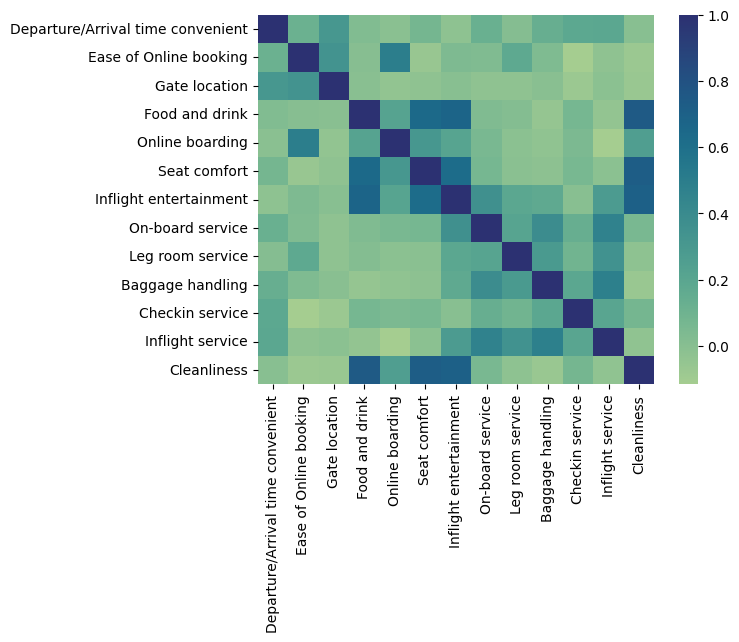

In [ ]:
corr = df[['Departure/Arrival time convenient','Ease of Online booking', 'Gate location', 'Food and drink','Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service',	'Leg room service',	'Baggage handling',	'Checkin service',	'Inflight service',	'Cleanliness']].corr()

sns.heatmap(corr, cmap="crest")

<Axes: >

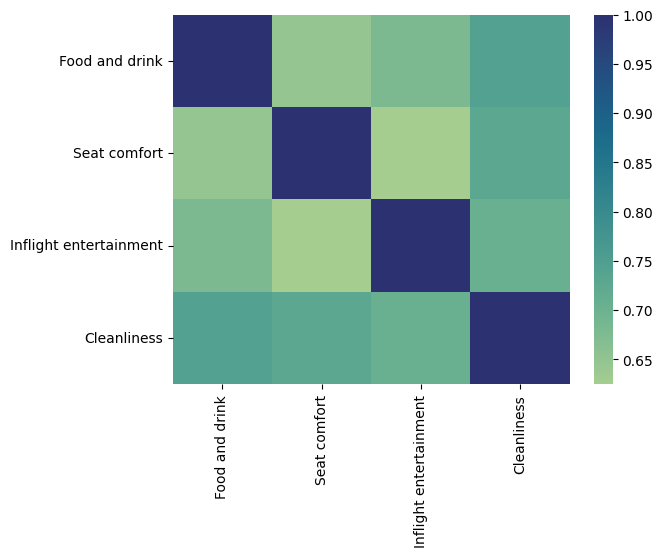

In [ ]:
corr = df[['Food and drink', 'Seat comfort', 'Inflight entertainment',	'Cleanliness']].corr()

sns.heatmap(corr, cmap="crest")

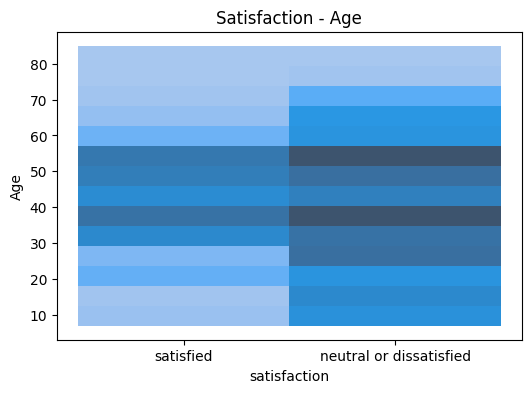

In [ ]:
plt.figure(figsize=(6,4))

sns.histplot(x='satisfaction', y='Age', data = df)
plt.title('Satisfaction - Age')
plt.show()

Машинное обучение. Предсказание satisfaction

In [11]:
X = df.drop(['satisfaction'], axis=1)

y = df['satisfaction']

In [12]:
X.head()

,id,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight wifi service,...,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
38,39,Female,46.0,Loyal Customer,Business travel,Business,67.0,0.0,0.0,3.0,...,4.0,5.0,4.0,4.0,4.0,4.0,4.0,5.0,4.0,5.0
51,52,Female,20.0,disloyal Customer,Business travel,Eco,67.0,2.0,10.0,4.0,...,5.0,4.0,5.0,5.0,4.0,5.0,5.0,3.0,4.0,5.0
56,57,Female,56.0,Loyal Customer,Business travel,Business,67.0,0.0,0.0,1.0,...,2.0,4.0,4.0,5.0,5.0,5.0,4.0,3.0,5.0,4.0
66,67,Male,50.0,Loyal Customer,Business travel,Business,67.0,0.0,0.0,4.0,...,2.0,4.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0
86,87,Male,65.0,Loyal Customer,Personal Travel,Eco,67.0,1.0,0.0,3.0,...,5.0,3.0,5.0,5.0,4.0,3.0,5.0,4.0,5.0,5.0


In [13]:
X['Customer Type'] = X['Customer Type'].map({'Loyal Customer' : 1, 'disloyal Customer' : 0})
X['Type of Travel'] = X['Type of Travel'].map({'Business travel' : 1, 'Personal Travel' : 0})
X['Gender'] = X['Gender'].map({'Male' : 1, 'Female' : 0})


In [14]:
X.drop(['Class'], axis=1, inplace=True)

In [15]:
X.head()

,id,Gender,Age,Customer Type,Type of Travel,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight wifi service,Departure/Arrival time convenient,...,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
38,39,0,46.0,1,1,67.0,0.0,0.0,3.0,3.0,...,4.0,5.0,4.0,4.0,4.0,4.0,4.0,5.0,4.0,5.0
51,52,0,20.0,0,1,67.0,2.0,10.0,4.0,0.0,...,5.0,4.0,5.0,5.0,4.0,5.0,5.0,3.0,4.0,5.0
56,57,0,56.0,1,1,67.0,0.0,0.0,1.0,1.0,...,2.0,4.0,4.0,5.0,5.0,5.0,4.0,3.0,5.0,4.0
66,67,1,50.0,1,1,67.0,0.0,0.0,4.0,4.0,...,2.0,4.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0
86,87,1,65.0,1,0,67.0,1.0,0.0,3.0,5.0,...,5.0,3.0,5.0,5.0,4.0,3.0,5.0,4.0,5.0,5.0


In [38]:
y = y.map({'satisfied': 1, 'neutral or dissatisfied': 0}).astype(int)

In [39]:
y[:2]

38    1
51    0
Name: satisfaction, dtype: int64

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train.shape, X_test.shape

((375, 22), (125, 22))

In [41]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train, y_train)

pred = model.predict(X_test)

In [42]:
pred[:10]

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [43]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, pred)

array([[68, 13],
       [17, 27]])

In [44]:
model.coef_

array([[-1.70099225e-05,  1.47805026e-02,  2.08861849e-03,
         1.80596663e-02,  9.07899706e-02, -3.88378825e-02,
        -3.32761793e-02,  1.65073945e-02,  2.27189334e-01,
        -7.80924064e-02,  1.12946480e-01,  1.95407957e-03,
         7.87676225e-02,  2.30477987e-01,  1.15986013e-01,
         1.82706103e-01,  5.78909076e-02,  4.52810240e-02,
        -1.09651853e-02, -1.87929562e-02, -4.65180263e-02,
         7.51140329e-02]])

In [45]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, pred)

0.76

In [46]:
y_test.value_counts()

0    81
1    44
Name: satisfaction, dtype: int64

In [50]:
from sklearn.metrics import recall_score
recall_score(y_test, pred)

0.6136363636363636

In [51]:
from sklearn.metrics import precision_score

precision_score(y_test, pred)

0.675

In [47]:
probs = model.predict_proba(X_test)

probs[:5]

array([[0.44690713, 0.55309287],
       [0.52774148, 0.47225852],
       [0.87726905, 0.12273095],
       [0.78796268, 0.21203732],
       [0.77652918, 0.22347082]])

In [48]:
probs[:,1][:5]

array([0.55309287, 0.47225852, 0.12273095, 0.21203732, 0.22347082])

In [49]:
classes = probs[:,1] > 0.5

classes[:5]

array([ True, False, False, False, False])

In [53]:
confusion_matrix(y_test, classes), recall_score(y_test, classes)

(array([[68, 13],
        [17, 27]]),
 0.6136363636363636)

In [68]:
classes = probs[:,1] > 0.03

confusion_matrix(y_test, classes), recall_score(y_test, classes)

(array([[ 2, 79],
        [ 0, 44]]),
 1.0)

In [69]:
X_train.head()

,id,Gender,Age,Customer Type,Type of Travel,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight wifi service,Departure/Arrival time convenient,...,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
44723,44724,0,16.0,1,0,67.0,18.0,14.0,3.0,5.0,...,5.0,3.0,5.0,5.0,4.0,5.0,5.0,5.0,4.0,5.0
50790,50791,1,48.0,1,0,86.0,0.0,4.0,1.0,3.0,...,4.0,1.0,4.0,4.0,3.0,2.0,3.0,2.0,4.0,4.0
44650,44651,0,53.0,1,1,67.0,0.0,0.0,3.0,3.0,...,2.0,5.0,1.0,5.0,5.0,5.0,5.0,1.0,5.0,1.0
39207,39208,0,69.0,1,1,67.0,7.0,8.0,2.0,2.0,...,1.0,3.0,3.0,3.0,3.0,3.0,2.0,1.0,3.0,4.0
49642,49643,0,37.0,1,1,86.0,0.0,0.0,3.0,1.0,...,3.0,3.0,3.0,3.0,2.0,5.0,5.0,5.0,5.0,3.0


In [70]:
from sklearn.preprocessing import MinMaxScaler

ss = MinMaxScaler()
ss.fit(X_train) # вычислить min, max по каждому столбцу

X_train = pd.DataFrame(ss.transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(ss.transform(X_test), columns=X_test.columns)

X_train.head()

,id,Gender,Age,Customer Type,Type of Travel,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight wifi service,Departure/Arrival time convenient,...,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
0,0.360177,0.0,0.115385,1.0,0.0,0.77907,0.240000,0.166667,0.6,1.0,...,1.00,0.6,1.00,1.00,0.75,1.0,1.00,1.00,0.75,1.00
1,0.409093,1.0,0.525641,1.0,0.0,1.00000,0.000000,0.047619,0.2,0.6,...,0.75,0.2,0.75,0.75,0.50,0.4,0.50,0.25,0.75,0.75
2,0.359588,0.0,0.589744,1.0,1.0,0.77907,0.000000,0.000000,0.6,0.6,...,0.25,1.0,0.00,1.00,1.00,1.0,1.00,0.00,1.00,0.00
3,0.315703,0.0,0.794872,1.0,1.0,0.77907,0.093333,0.095238,0.4,0.4,...,0.00,0.6,0.50,0.50,0.50,0.6,0.25,0.00,0.50,0.75
4,0.399837,0.0,0.384615,1.0,1.0,1.00000,0.000000,0.000000,0.6,0.2,...,0.50,0.6,0.50,0.50,0.25,1.0,1.00,1.00,1.00,0.50


In [71]:
model = LogisticRegression()

model.fit(X_train, y_train)

pred = model.predict(X_test)

In [72]:
model.coef_, model.intercept_

(array([[-0.04500471,  0.34267601, -0.2903986 ,  1.78718599,  2.77361863,
          0.06535734, -0.52825985, -0.28978874,  2.55177993,  0.09000038,
         -0.95269403, -0.25145019, -0.35868297,  1.2911438 ,  0.43630254,
          1.89389423,  0.43510327,  0.5200403 , -0.37936716,  0.95628006,
         -0.90663648, -0.4007349 ]]),
 array([-6.81451789]))

In [73]:
importances = pd.DataFrame({'weights': model.coef_[0], 'features': X_train.columns}).sort_values(by='weights')
importances.head()

,weights,features
10,-0.952694,Ease of Online booking
20,-0.906636,Inflight service
6,-0.528260,Departure Delay in Minutes
21,-0.400735,Cleanliness
18,-0.379367,Baggage handling


In [74]:
X = df.drop(['satisfaction'], axis=1)

y = df['satisfaction']

In [75]:
X.dtypes

id                                     int64
Gender                                object
Age                                  float64
Customer Type                         object
Type of Travel                        object
Class                                 object
Flight Distance                      float64
Departure Delay in Minutes           float64
Arrival Delay in Minutes             float64
Inflight wifi service                float64
Departure/Arrival time convenient    float64
Ease of Online booking               float64
Gate location                        float64
Food and drink                       float64
Online boarding                      float64
Seat comfort                         float64
Inflight entertainment               float64
On-board service                     float64
Leg room service                     float64
Baggage handling                     float64
Checkin service                      float64
Inflight service                     float64
Cleanlines

In [78]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical = ['Gender', 'Customer Type', 'Type of Travel']
numeric_features = [col for col in X_train.columns if col not in categorical]

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(drop='first', handle_unknown="ignore"), categorical),
    ('scaling', MinMaxScaler(), numeric_features)
])

X_train_transformed = column_transformer.fit_transform(X_train)
X_test_transformed = column_transformer.transform(X_test)

In [79]:
X_train_transformed

array([[0.  , 1.  , 0.  , ..., 1.  , 0.75, 1.  ],
       [1.  , 1.  , 0.  , ..., 0.25, 0.75, 0.75],
       [0.  , 1.  , 1.  , ..., 0.  , 1.  , 0.  ],
       ...,
       [1.  , 1.  , 1.  , ..., 0.  , 0.75, 0.25],
       [0.  , 1.  , 0.  , ..., 1.  , 0.  , 0.25],
       [0.  , 1.  , 0.  , ..., 0.5 , 1.  , 0.25]])

In [80]:
lst = list(column_transformer.transformers_[0][1].get_feature_names_out())
lst.extend(numeric_features)

X_train_transformed = pd.DataFrame(X_train_transformed, columns=lst)
X_test_transformed = pd.DataFrame(X_test_transformed, columns=lst)

X_train_transformed.head()

,Gender_1.0,Customer Type_1.0,Type of Travel_1.0,id,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight wifi service,Departure/Arrival time convenient,...,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
0,0.0,1.0,0.0,0.360177,0.115385,0.77907,0.240000,0.166667,0.6,1.0,...,1.00,0.6,1.00,1.00,0.75,1.0,1.00,1.00,0.75,1.00
1,1.0,1.0,0.0,0.409093,0.525641,1.00000,0.000000,0.047619,0.2,0.6,...,0.75,0.2,0.75,0.75,0.50,0.4,0.50,0.25,0.75,0.75
2,0.0,1.0,1.0,0.359588,0.589744,0.77907,0.000000,0.000000,0.6,0.6,...,0.25,1.0,0.00,1.00,1.00,1.0,1.00,0.00,1.00,0.00
3,0.0,1.0,1.0,0.315703,0.794872,0.77907,0.093333,0.095238,0.4,0.4,...,0.00,0.6,0.50,0.50,0.50,0.6,0.25,0.00,0.50,0.75
4,0.0,1.0,1.0,0.399837,0.384615,1.00000,0.000000,0.000000,0.6,0.2,...,0.50,0.6,0.50,0.50,0.25,1.0,1.00,1.00,1.00,0.50


In [81]:
model = LogisticRegression()

model.fit(X_train_transformed, y_train)

pred = model.predict_proba(X_test_transformed)[:,1]

In [82]:
classes = pred > 0.5

confusion_matrix(y_test, classes), recall_score(y_test, classes)

(array([[79,  2],
        [14, 30]]),
 0.6818181818181818)

In [94]:
classes = pred > 0.01

confusion_matrix(y_test, classes), recall_score(y_test, classes)

(array([[ 0, 81],
        [ 0, 44]]),
 1.0)

In [95]:
importances = pd.DataFrame({'weights': model.coef_[0], 'features': X_train_transformed.columns}).sort_values(by='weights')
importances

,weights,features
10,-0.952694,Ease of Online booking
20,-0.906636,Inflight service
6,-0.528260,Departure Delay in Minutes
21,-0.400735,Cleanliness
18,-0.379367,Baggage handling
12,-0.358683,Food and drink
4,-0.290399,Age
7,-0.289789,Arrival Delay in Minutes
11,-0.251450,Gate location
3,-0.045005,id


In [96]:
import pickle

with open('model.pickle', 'wb') as f:
    pickle.dump(model, f)

#а так модель можно загрузить из файла:
with open('model.pickle', 'rb') as f:
    model = pickle.load(f)